# STEM for Creatives Week 5 - Audio

This week we will see how **audio is represented on computers**, how we can cut it up and rearrange it, and how we can inspect or edit a sequence but write very little code to do it!

## How does music exist?

There are two main ways we can represent music:

Either **symbolically**, for example a score. This is a representation of how some music should be played (for example some notes at a given time)

Or, as the raw sound itself


## Audio files are just arrays 

Sound in the physical world is just __vibrations__ in air. Our ear picks these up, transfers them to mechanical motion, then electrical signals!

Precomputer (analog), we could record, replay, and amplify this using electrical cables 

In a digital world, we **can't represent a continuous signal**. Instead,  we __sample__ this signal (take a measurement at short intervals). 

This leaves us with a list of numbers (normally between -1 and 1) that represent some audio. 

## Sequences

Both **symbolic** and **raw audio** representations of music are sequential, so today we'll look at some coding tools for working with data like this!


## Librosa - Audio in Python

### Loading Samples

First, we're just going to use it to read in sound files, and maybe mess with their sample rates.

Using ```librosa.load()```, we get the sample data back as an array, as well as the sample rate of the file.

We'll then show you how you can manipulate the array and play it back and get some cool audio effects.

In [1]:
#Install he library
!pip install librosa

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
#Loading in sample file, returns an array containing the samples, as the sample rate 
audio_data, sr = librosa.load('audio/gospel.wav')

In [4]:
audio_data

array([9.3480958e-07, 8.9430614e-07, 3.8675353e-07, ..., 9.4976331e-06,
       1.0108697e-05, 7.6896858e-06], dtype=float32)

In [5]:
#How many samples? What sample rate? Unless you specify, librosa will automatically
#convert you sample to 22050
print(audio_data.shape, sr)
#How many seconds is that?
print(audio_data.shape[0] / sr)

(420955,) 22050
19.09092970521542


In [6]:
#Define a custom function to show and play an audio file
def show_audio(y, sr=44100, normalise=True):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_ylim(-1,1)
    librosa.display.waveshow(y, sr=sr, ax=ax)
    return ipd.Audio(y, rate=sr, normalize=normalise, autoplay=True)

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

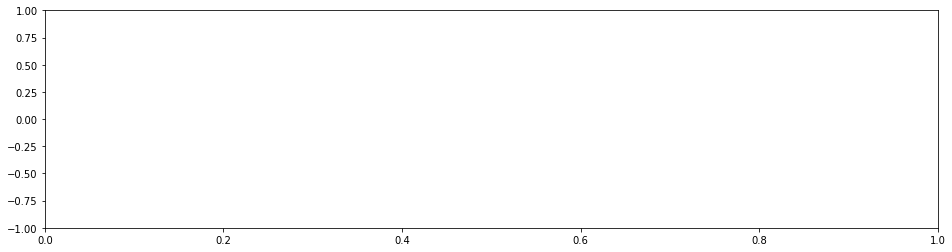

In [7]:
#Play the samples
show_audio(audio_data, sr)

## Lots of changes, little code

Obviously when we want to analyse or manipulate this audio file, with **44100 values a second** we dont want to have to write code to change each sample by hand!

Thats too much man.

We'll look at 3 ways you can apply operations to all or part of an array using not much code at all!

1. Traditional maths, either with a single number, or another list of the same length


2. For Loops


3. Windowing

### Maths with Audio Files

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

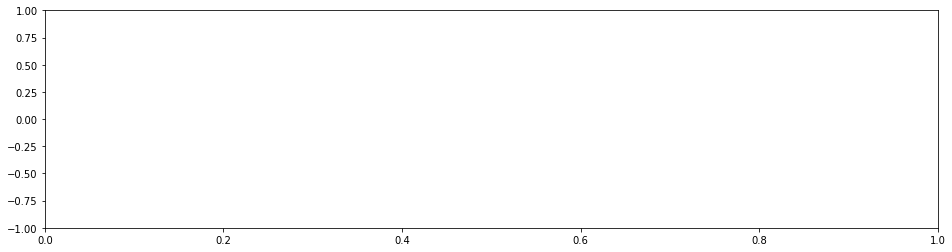

In [ ]:
#We can change the volume
#Multiply all the samples by 0.2

audio_output = audio_data * 0.2
show_audio(audio_output, sr, False)

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

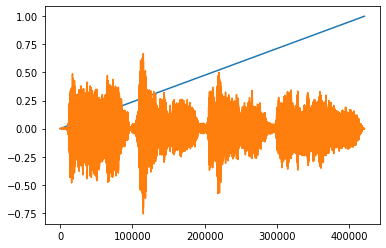

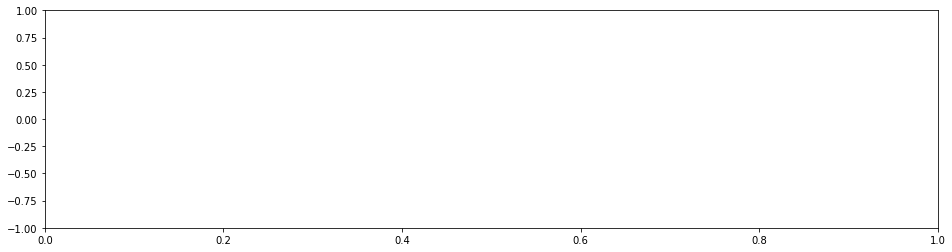

In [ ]:
#We can fade in
#Multiply the samples array by another array containing a ramp from 0->1
ramp = np.linspace(0,1,len(audio_data))
audio_output = audio_data * ramp
plt.plot(ramp)
plt.plot(audio_data)
show_audio(audio_output, sr)

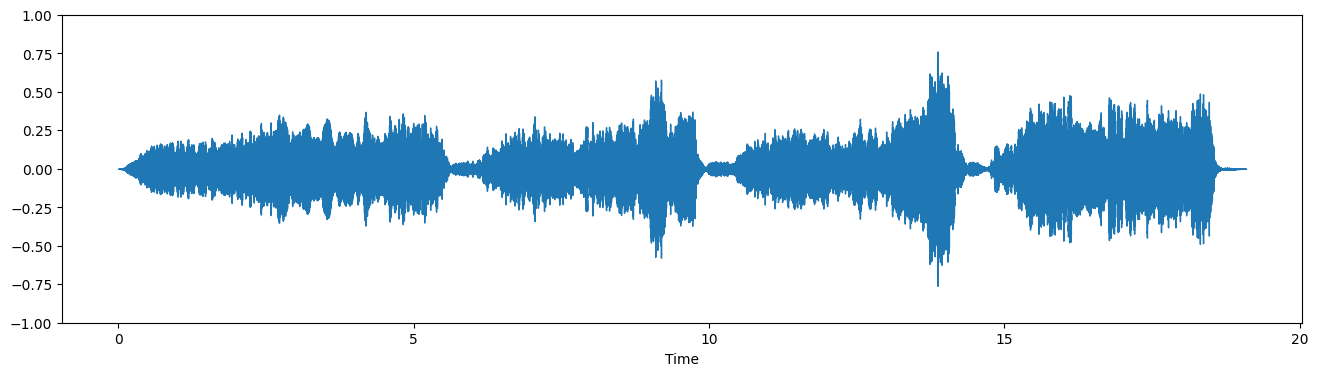

In [ ]:
#We can play the sound backwards
#Just reverse the array
audio_output = np.flip(audio_data)
show_audio(audio_output, sr)

### Multiple Samples

We'll now introduce some more samples and show how we can **combine**

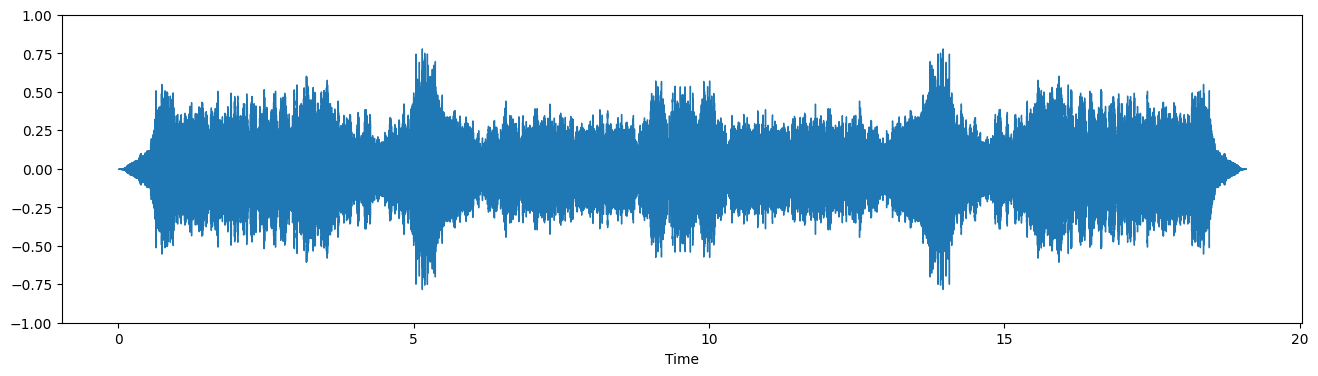

In [ ]:
#Combine (using +) them together. NOT overwrite.
audio_output = audio_data + np.flip(audio_data)
show_audio(audio_output, sr)

### Multi Channel

If we have a 2D array with two channels of audio, we can do stereo!

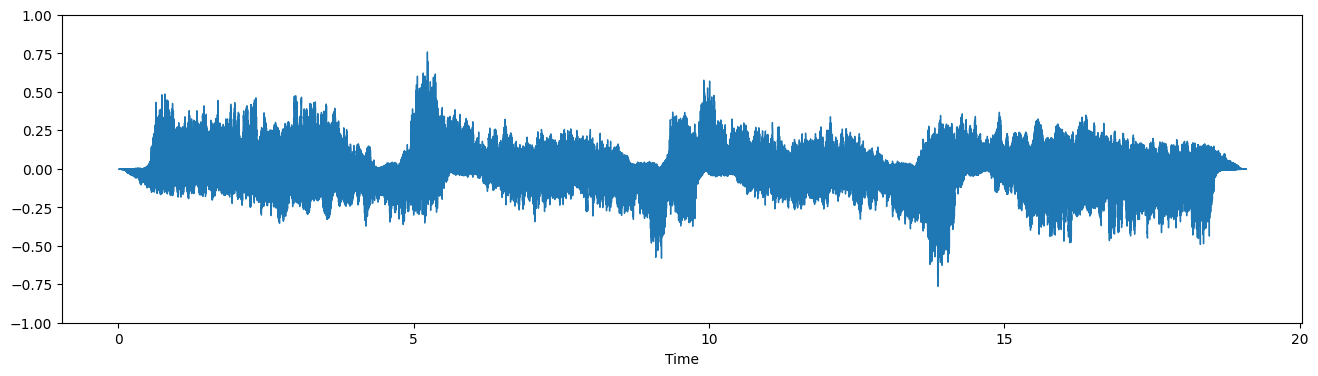

In [ ]:
#Make an array with the two samples, one in each channel
#forwards on left [0], backwards on right [1]
audio_output = np.array([audio_data,np.flip(audio_data)])
show_audio(audio_output, sr)

### Changing the playback rate 

We can change the sample rate and this effects the length and the pitch of an audio file. This is analagous to playing a record player faster or slower. 

Essentially, we take **same numbers / samples** and either interpret them to represent **more or less time**

For example, if the sample rate is 44100Hz, then 44100 samples represents 1 second of sound. At 22050Hz, 44100 samples represents 2 seconds of sound

Taking the **same numbers / samples** and playing at a lower sample rate, means we take longer to play through the samples and it sounds lower.

Taking the **same numbers / samples** and playing at a higher sample rate, means we move through the samples quicker and it sounds higher.


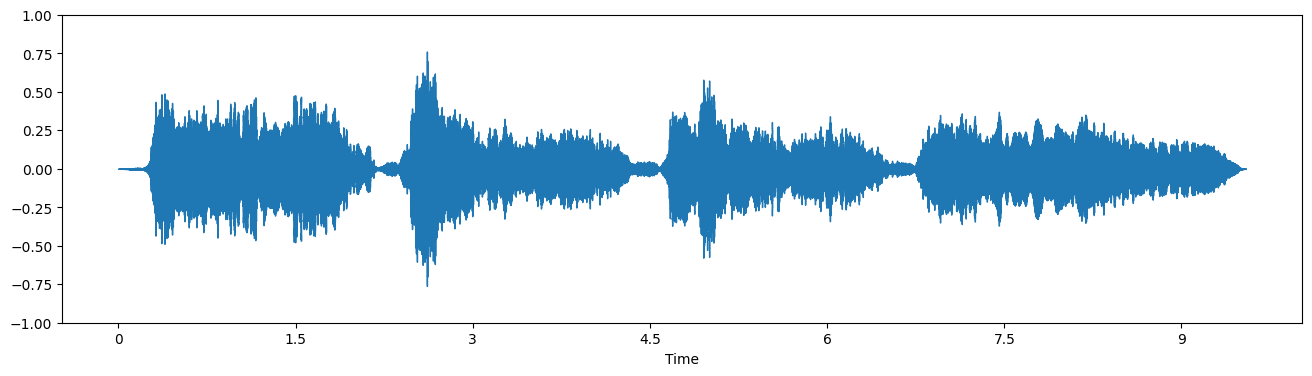

In [ ]:
#We can play at a different speed (higher sample rate = faster playback)
#Also half the length (look at the x axis!)
show_audio(audio_data, sr*2)

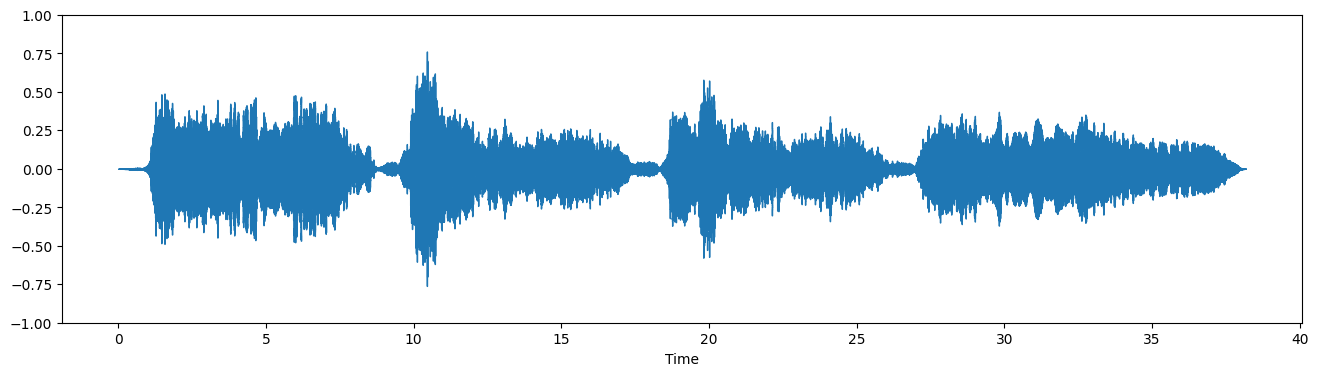

In [ ]:
#We can play at a different speed (lower sample rate = slower playback)
#Also, twice the length (look at the x axis!)
show_audio(audio_data, sr/2)

## For Loops

### One piece of code, applied over a whole list

As mentioned at the top, when changing or analysing an audio file, writing code to address every sample individually would be time consuming and pointless! 

However, if we want to do something over time and **not hand write new code every step**, we can use a control structure common in lots of coding, and especially useful in **time based media** 

* Audio


* Video 


* Games 


### In Code

The code underneath dictates what repeated actions we do with ``i`` each time and **must** be indented with a tab, otherwise Python will complain. 

This can be a single line code, or multiple lines. Every line that is indented will be included in the loop and executed each time.

```
for i in array:
    do_something_with_i 
#end of loop
```
    
```
for i in array:
     do_something_with_i
     do_something_else_with_i
     do_another_thing
#end of loop
```

Remember, our audio file is just **an array of samples**. With this we can now write **one piece of code** that iterates over our whole audio file **sample by sample** and either analyses or edits it.



## Windows (or Buffers)

Unfortunately, looking at an individual sample, or changes sample to sample, **often doesnt tell us much**. Semantically interesting events tend to happen over much **longer periods**. 

So we can slice our audio into short samples, then compute statistics based on a much longer time frame. It means we are more likely to have enough information to capture something meaningful happening, and we're not having to deal with so much information. 

Here, we grab the first 1024 samples and get the **mean amplitude** 

3.5415735e-07


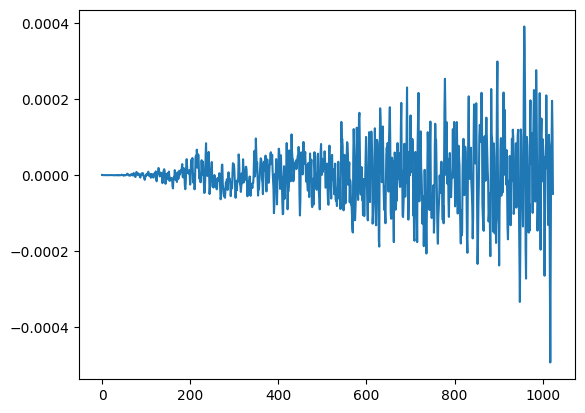

In [ ]:
window_size = 1024
buffer = audio_data[0:window_size]
mean = np.abs(buffer.mean())
print(mean)
plt.plot(buffer)

We're going to want to do the same for the whole audio file! In order to get all the buffers with minimal code, we can use a ``for loop``. 

**Play around with the size of the window and see how it changes the output plot**

In the first approach, we calculate the number of buffers that the audio file will split into, then do this many loops, each time increasing the variable `i` by 1. We can use `i` to calculate a `start` and `end` for each window then grab some audio from the array. 

411 420955


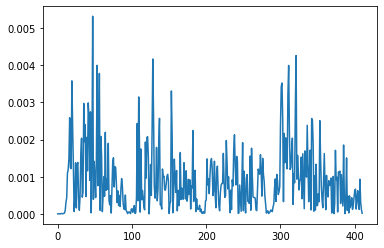

In [ ]:
window_size = 1024
num_buffers = len(audio_data)//window_size
amps = []
#Do this code to every buffer
for i in range(num_buffers):
    start = i*window_size
    end = (i+1)*window_size
    buffer = audio_data[start:end]
    mean = np.abs(buffer.mean())
    #Store in list
    amps.append(mean)
print(len(amps),len(audio_data))
plt.plot(amps)

In a second approach we use a built in method (`librosa.util.frame()`) to generate the buffers first. We then use a `for loop` to iterate over this collection of frames. Each time we go round the loop a subsequent window of audio is stored in the `buffer` variable.

It returns a matrix (2D array) that is `window_size x num_buffers`, but we want to iterate over each buffer one by one. We take the `transpose()` of the matrix to [swap the rows and columns](https://www.mathsisfun.com/definitions/transpose-matrix-.html).


/var/folders/v7/r2vfsryx1_j9r9ztkdfc_z2m0000gn/T/ipykernel_91853/1431963701.py:1: FutureWarning: Pass frame_length=1024, hop_length=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  windows = librosa.util.frame(audio_data, window_size, window_size).transpose()


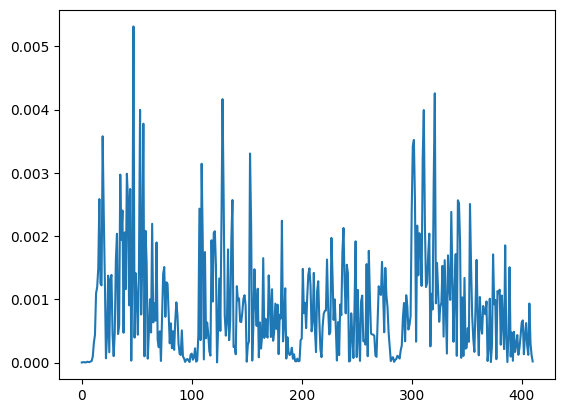

In [ ]:
windows = librosa.util.frame(audio_data, window_size, window_size)
windows = windows.transpose()
amps = []
for buffer in windows:
    mean = np.abs(buffer.mean())
    amps.append(mean)
plt.plot(amps)

## Spectral Information

There are limitations of amplitude analysis. One of the major issues here is that there are changes in audio that **might** be important, but that aren’t necessarily reflected in the amplitude values very strongly. One example is pitch.

A musical melody might have lots of **different pitches **in it, but they might **not look any different in terms of amplitude **(unless they naturally have gaps between them). So, importantly, what kind of information is this, and how can we go about finding it in the signal? Beyond this:

- What different frequencies are present?
- What are the timbral qualities of the sound?
- Where are the main percussive events?
- Whats the tempo?
- Where are the beats?
- What instruments are playing?

### FFTs

There are lots of ways of trying to extract frequency information from an audio buffer. The most important method is known as the **Fourier Transform**.

The **fourier transform** can tell you a lot about the universe, and provide you with spectral decompositions. The maths behind the transform are a bit off-topic for this session. It’s much more important to understand what information comes out of the **Fourier transform**!

For a small window of time, we are able to get the strength of different frequencies present between various ranges, or bins. 

The number of bins we get, and how much frequency they each cover, is a factor of the size of the window we analyse. As such, we must make a choice between resolution in the time domain (smaller windows allow us to spot shorter changes in the input signal), and resolution in the frequency domain (smaller bands allow us to be more specific about which frequencies are present). 


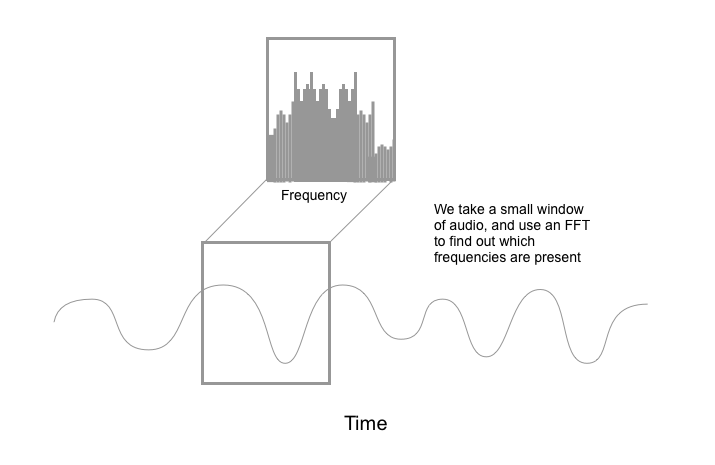

In [ ]:
from IPython.display import Image
Image(filename='images/fft.png') 

In [ ]:
def show_audio(y, sr=44100, fft_size = 2048):
    fig, ax = plt.subplots(ncols=2,figsize=(16,4))
    #Show waveform
    librosa.display.waveshow(y, sr=sr, ax=ax[0])
    #Get FFT
    S = np.abs(librosa.stft(y,fft_size))
    #Show FFT
    librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time', ax=ax[1])
    return ipd.Audio(y, rate=sr, autoplay=True)

In [ ]:
#Note the logarithmic scale in the y axis
y, sr = librosa.load('audio/gospel.wav')
show_audio(y, sr)

In [ ]:
#low frequency resolution, high time resolution
show_audio(y, sr, 256)

In [ ]:
#high frequency resolution, low time resolution
show_audio(y, sr, 2048*4)

In [ ]:
import numpy as np
from cv2 import circle
from Animator import Animator
from MusicAnalyser import MusicAnalyser

file_path = "audio/gospel.wav"
mus = MusicAnalyser(file_path)
an = Animator(640,480)

class MySketch:

    def __init__(self):
        an.start_loop(self.setup, self.draw)  
            
    def setup(self):
        wave = []
        window_size = 1024
        num_buffers = len(mus.y)//window_size
        #Do this code to every buffer
        for i in range(num_buffers):
            start = i*window_size
            end = (i+1)*window_size
            buffer = mus.y[start:end]
            mean = np.abs(buffer.mean())
            wave.append(mean)
        for i,b in enumerate(wave):
            #draw a circle based on the mean volume of each buffer
            circle(an.to_alpha(0.2), (i*2,an.height//2), int(b*30000), (255,0,0), -1)
        
    def draw(self):
        return
            

MySketch()

init
################################################################################
press Return to kill  music
################################################################################


In [ ]:
import numpy as np
from cv2 import line
from Animator import Animator
from MusicAnalyser import MusicAnalyser

file_path = "audio/gospel.wav"
mus = MusicAnalyser(file_path)
an = Animator(640,480)

class MySketch:

    def __init__(self):
        an.start_loop(self.setup, self.draw)  
            
    def setup(self):
        print("setup")
        
    def draw(self):
        an.background(0)
        for i,val in enumerate(mus.fft_vals):
            x = i*2
            y = an.height-int(val*100)
            line(an.canvas, (x, an.height), (x,y), (0,255,0), 1)
            

MySketch()

init
setup
################################################################################
press Return to kill  music
################################################################################


In [ ]:
import numpy as np
from cv2 import circle
from Animator import Animator
from MusicAnalyser import MusicAnalyser

file_path = "audio/1.wav"
mus = MusicAnalyser(file_path)
an = Animator(640,480)

class MySketch:

    def __init__(self):
        an.start_loop(self.setup, self.draw)  
            
    def setup(self):
        print("setup")
        
    def draw(self):
        an.background(0)
        for i, val in enumerate(mus.fft_vals):
            x = i * 2
            y = an.height - int(val * 100)
            radius = int(val * 20)  # 设置半径，基于音频值
            # 根据频率值调整颜色
            color = tuple(np.random.randint(0, 256, 3).tolist())  # 生成随机彩色
            circle(an.canvas, (x, y), radius, color, -1)  # 画圆形
            

MySketch()

init
setup
################################################################################
press Return to kill  music
################################################################################


In [ ]:
import numpy as np
from cv2 import circle
import random
from Animator import Animator
from MusicAnalyser import MusicAnalyser

file_path = "audio/1.wav"
mus = MusicAnalyser(file_path)
an = Animator(640, 480)

class MySketch:

    def __init__(self):
        an.start_loop(self.setup, self.draw)  
            
    def setup(self):
        print("setup")

    # code reference: 'https://blog.csdn.net/weixin_46277779/article/details/130248390?ops_request_misc=&request_id=&biz_id=102&utm_term=random生成随机颜色&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-9-130248390.142^v96^control&spm=1018.2226.3001.4187'
    # Generate random color string
    def randomcolor(self):
        colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color_str = "#"+''.join([random.choice(colorArr) for i in range(6)])
        # Convert color string to BGR format
        color_bgr = tuple(int(color_str[i:i+2], 16) for i in (1, 3, 5))
        return color_bgr

    def draw(self):
        an.background(0)
        for i, val in enumerate(mus.fft_vals):
            x = i * 2
            y = an.height//2
            radius = int(val * 20)  # Set radius, based on audio value
            color = self.randomcolor()  # Generate random colors
            circle(an.canvas, (x, y), radius, color, 1)  # draw circle

MySketch()

init
setup
################################################################################
press Return to kill  music
################################################################################


In [ ]:
import numpy as np
from cv2 import circle
import random
from Animator import Animator
from MusicAnalyser import MusicAnalyser

file_path = "audio/1.wav"
mus = MusicAnalyser(file_path)
an = Animator(640, 480)

class MySketch:

    def __init__(self):
        an.start_loop(self.setup, self.draw)  
            
    def setup(self):
        print("setup")
        self.circles = []  # 存储圆形的列表

    # 生成随机颜色字符串
    def randomcolor(self):
        colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color_str = "#"+''.join([random.choice(colorArr) for i in range(6)])
        # 将颜色字符串转换为 BGR 格式
        color_bgr = tuple(int(color_str[i:i+2], 16) for i in (1, 3, 5))
        return color_bgr

    def draw(self):
        an.background(0)
        for circle_data in self.circles:
            x, y, radius, color, alpha = circle_data
            circle(an.canvas, (x, y), radius, color, -1)  # 画实心圆形

        # 在每一帧中添加新的圆形
        for i, val in enumerate(mus.fft_vals):
            x = i * 2
            y = an.height//2
            radius = int(val * 20)  # 基于音频值设置半径
            color = self.randomcolor()  # 生成随机颜色
            alpha = 255  # 初始化透明度
            circle_data = [x, y, radius, color, alpha]
            self.circles.append(circle_data)  # 将圆形数据添加到列表

MySketch()


init
setup
################################################################################
press Return to kill  music
################################################################################


这段代码实现了一个基于音频分析的动画效果。代码中使用了音频分析和动画生成库来创建一个根据音频信号变化而动态生成圆形的视觉效果


In [ ]:
import numpy as np
from cv2 import circle
import random
from Animator import Animator
from MusicAnalyser import MusicAnalyser

file_path = "audio/1.wav"
mus = MusicAnalyser(file_path)
an = Animator(640, 480)

class MySketch:

    def __init__(self):
        an.start_loop(self.setup, self.draw)  
            
    def setup(self):
        print("setup")
        self.circles = []

    '''
    # code reference: 'https://blog.csdn.net/weixin_46277779/article/details/130248390?ops_request_misc=&request_id=&biz_id=102&utm_term=random生成随机颜色&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-9-130248390.142^v96^control&spm=1018.2226.3001.4187'
    # Generate random color string
    def randomcolor(self):
        colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color_str = "#"+''.join([random.choice(colorArr) for i in range(6)])
        # 将颜色字符串转换为 BGR 格式
        color_bgr = tuple(int(color_str[i:i+2], 16) for i in (1, 3, 5))
        return color_bgr
    '''

        # color reference：https://pigment.shapefactory.co
        # Defines a color list, then randomly selects a color from it 
    def randomcolor(self):
        # color_str = ['#A4C4A3', '#B9D7B8', '#85A784', '#688B67', '#BE3353', '#D65071', '#ED6F90', '#FD98B5'] #Pink and Green
        color_str = ['#F2B2C6', '#D18B9F', '#B86F82', '#9F5466', '#D791A7', '#BA7186', '#A55A6E', '#8C4657'] #Pink
        # converts it to BGR format
        color_bgr = [tuple(int(color[i:i+2], 16) for i in (1, 3, 5)) for color in color_str]
        return random.choice(color_bgr)  


    def draw(self):
        an.background(0)
        for circle_data in self.circles:
            x, y, radius, color = circle_data
            circle(an.canvas, (x, y), radius, color, -1)  # draw circle

        # Add new circle in every frame
        for i, val in enumerate(mus.fft_vals):
            x = i * 2
            y = an.height//2
            radius = int(val * 30) 
            color = self.randomcolor()
            circle_data = [x, y, radius, color]
            # Add circular data to the list
            self.circles.append(circle_data) 

MySketch()

init
setup
################################################################################
press Return to kill  music
################################################################################



* How your sketch works 

这个草图的目的是创建一个基于音频信号的动态可视化效果。首先定义了黄色和紫色的颜色集合，并设置了随机颜色。
在绘制图形的过程中，为每个音频值生成一个新的圆形，根据频率值的大小选择不同的颜色系列，然后绘制相应的圆形，并且圆形的半径和坐标跟随者频率值的变化而不断变化。
将所有生成的圆都保留在画面中，使在播完音频后画面上是一副完整的展示了这段音频的图像。

* How well you feel it displays information about audio files. This may include how well it works for different audio files / artists / genres. Include screenshots or videos to support your points 

播完音频后画面上是一副完整的展示了这段音频的图像。根据频率值的不同，动态可视化展示和最后呈现的画面都会完全不一样。

In [8]:
import numpy as np
from cv2 import circle
import random
from Animator import Animator
from MusicAnalyser import MusicAnalyser

file_path = "audio/1.wav"
mus = MusicAnalyser(file_path)
an = Animator(640, 480)

class MySketch:

    def __init__(self):
        an.start_loop(self.setup, self.draw)  
            
    def setup(self):
        print("setup")
        self.circles = []

  
        # Code reference for random colors: 'https://blog.csdn.net/weixin_46277779/article/details/130248390?ops_request_misc=&request_id=&biz_id=102&utm_term=random生成随机颜色&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-9-130248390.142^v96^control&spm=1018.2226.3001.4187'
        # Color value source：https://pigment.shapefactory.co
        # DefineCs a color list, then randomly selects a color from it 
    def yellowcolor(self):
        # Yellow color series
        colorArr = ['#F2D866', '#DFC350', '#EECA57', '#EFD780', '#FCF0CA', '#FBDC64', '#FDEBB3', '#FCDA48'] 
        # converts it to RGB format
        color_rgb = [tuple(int(color[i:i+2], 16) for i in (1, 3, 5)) for color in colorArr]
        return random.choice(color_rgb)  
    
    def purplrcolor(self):
        # Purplr color series
        colorArr = ['#75538D', '#5B3E71', '#492E5D', '#3D2450', '#8A5CB7', '#774AA3', '#3D2450', '#643A8E'] 
        color_rgb = [tuple(int(color[i:i+2], 16) for i in (1, 3, 5)) for color in colorArr]
        return random.choice(color_rgb)


    def draw(self):
        an.background(0)
        for circle_data in self.circles:
            x, y, radius, color = circle_data
            # draw circle
            circle(an.canvas, (x, y), radius, color, -1) 

        # The frequency value of the audio sample
        frequency_threshold = 10 
        for i, val in enumerate(mus.fft_vals):
            x = i * 4
            y = an.height // 2
            radius = int(val * 5)
            # Use purple color series for low frequency
            if val < frequency_threshold:
                color = self.purplrcolor() 
            # Use yellow color otherwise 
            else:
                color = self.yellowcolor()  
            circle_data = [x, y, radius, color]
            self.circles.append(circle_data)

MySketch()

init
setup
################################################################################
press Return to kill  music
################################################################################
